In [2]:
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import sklearn
import numpy as np

In [3]:
# Kaggle download
# !kaggle competitions download -c playground-series-s5e10
# !unzip ./playground-series-s5e10.zip -d ./data/
# !rm playground-series-s5e10.zip


In [4]:
# see data 
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_sub = pd.read_csv('./data/sample_submission.csv')


In [5]:
df_train.shape

(517754, 14)

In [6]:
df_train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [7]:
df_train.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [8]:
df_train.isna().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

# Data Exploration

## numeric 

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


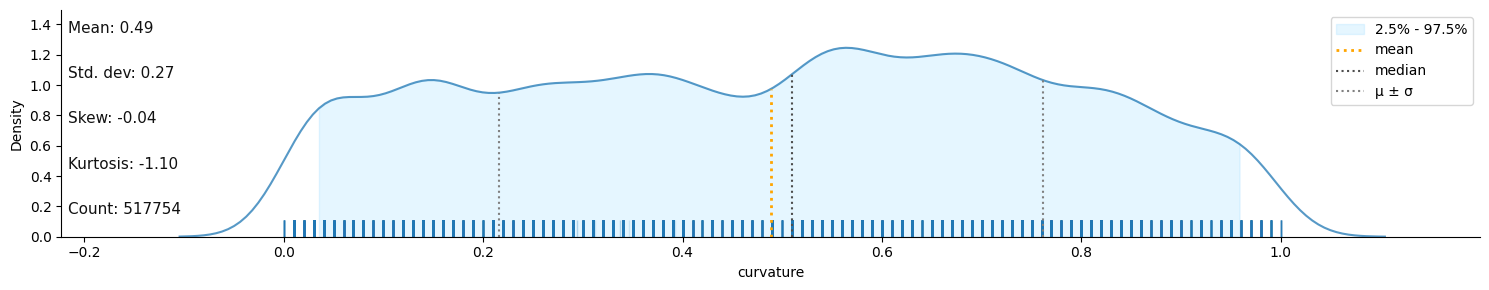

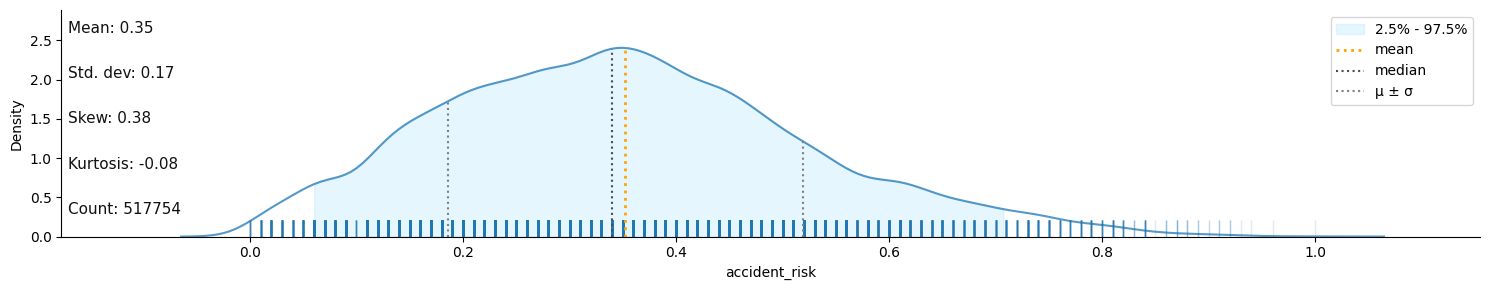

In [9]:
# visualised each of the columns, with the target column at the end in klib
for col in ['curvature', 'accident_risk']:
    klib.dist_plot(df_train[col])


## categorical

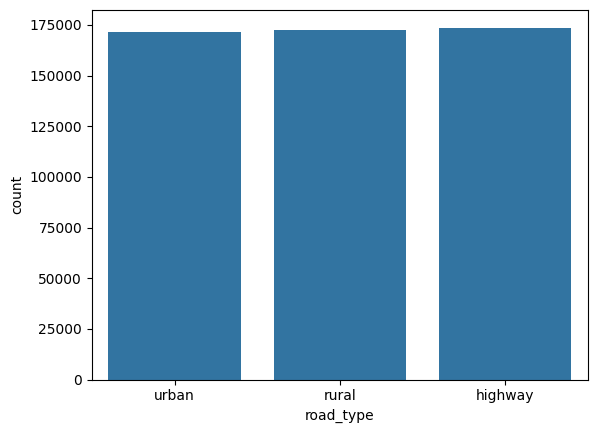

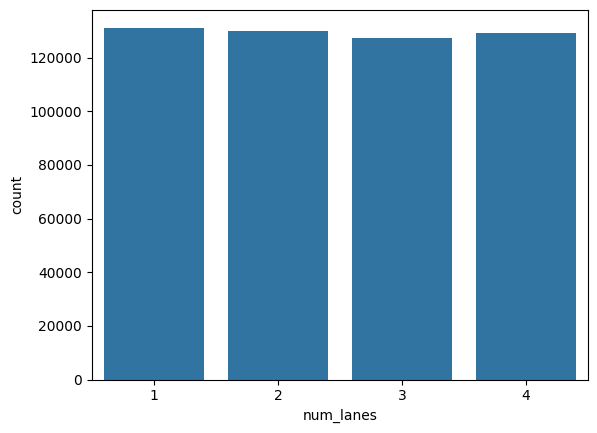

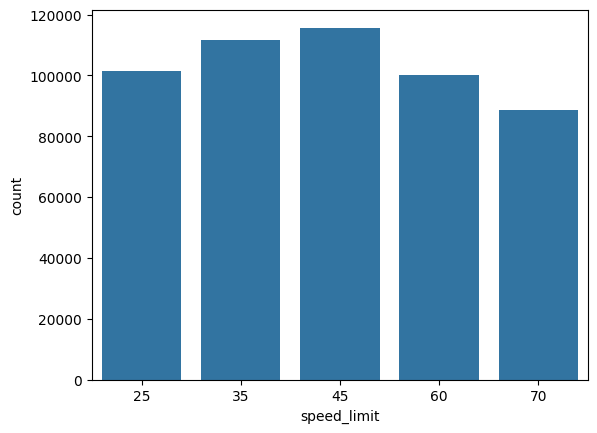

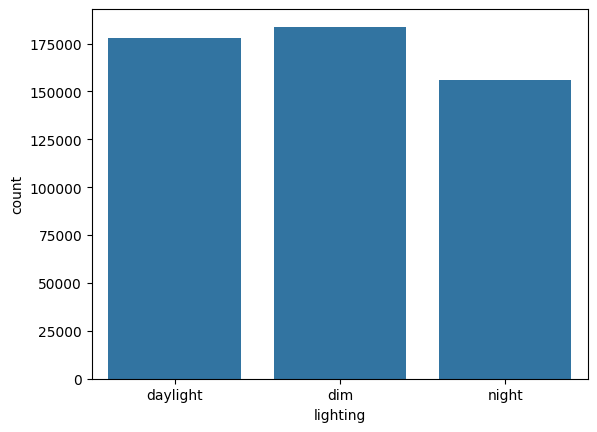

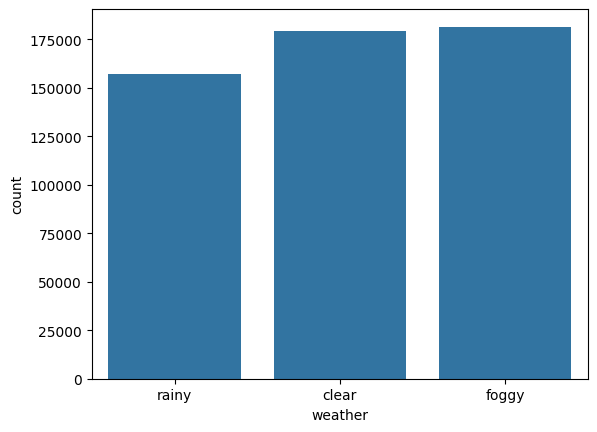

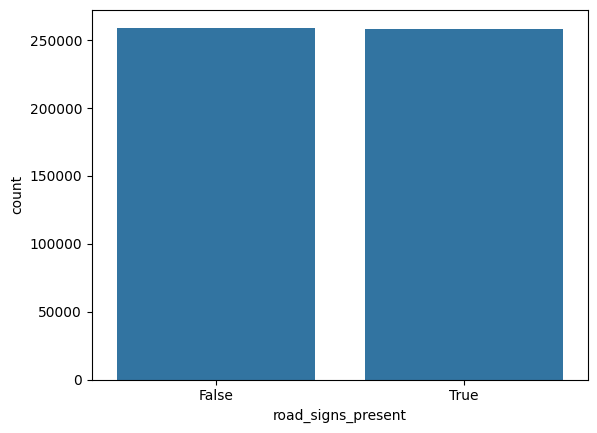

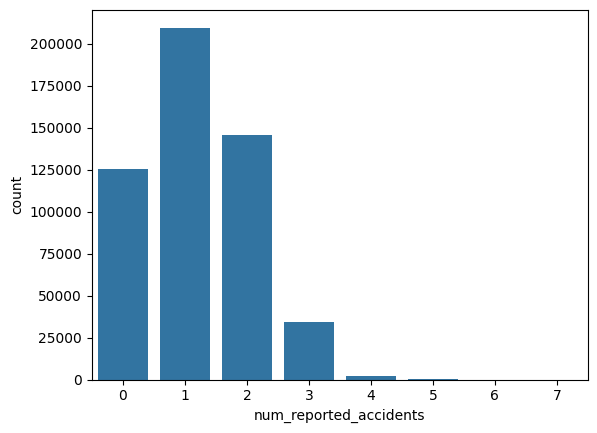

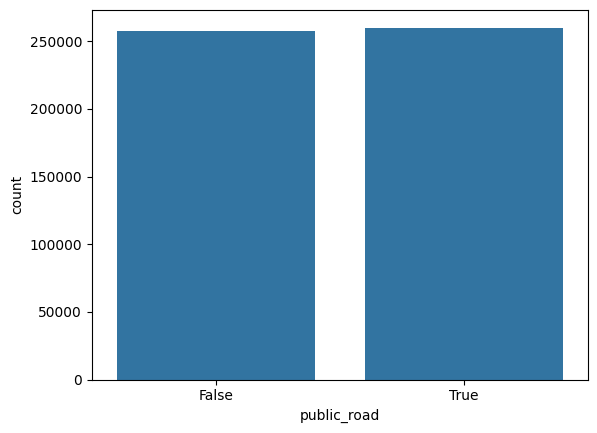

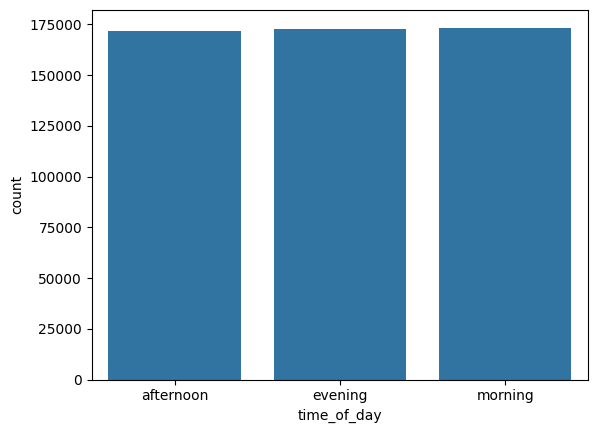

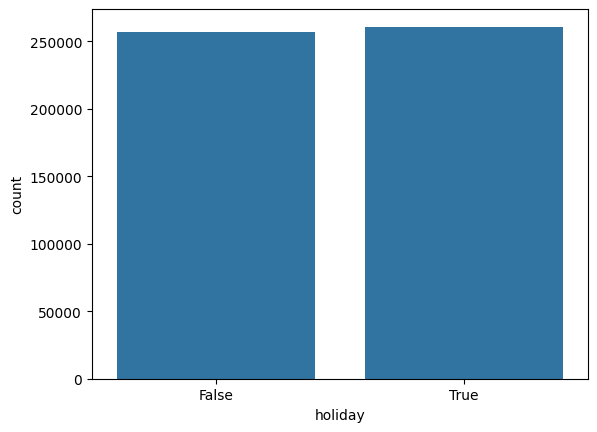

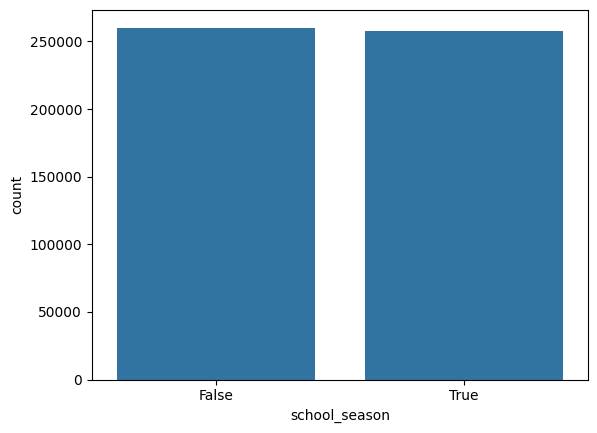

In [10]:
cat_cols = ['road_type', 'num_lanes', 'speed_limit', 'lighting', 'weather', 'road_signs_present', 'num_reported_accidents',
            'public_road', 'time_of_day', 'holiday', 'school_season']
for c in cat_cols:
    sns.countplot(data=df_train, x=c)
    plt.show()

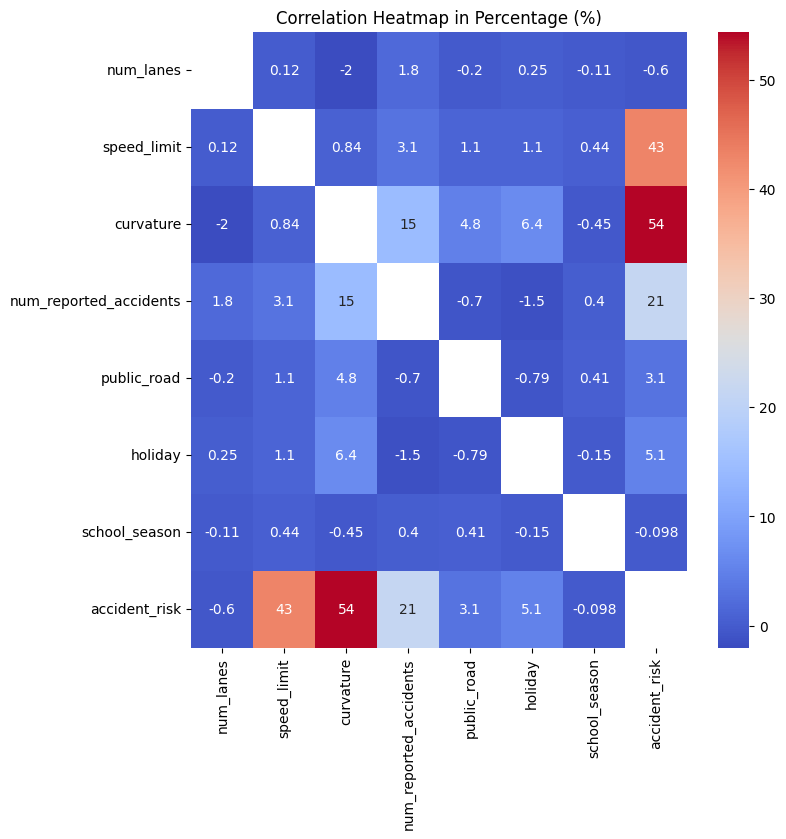

In [11]:
# Correlation heatmap of each of the columns to 'accident_risk'
num_cols = ['num_lanes', 'speed_limit', 'curvature', 'num_reported_accidents']
bool_cols = ['public_road', 'holiday', 'school_season']
plt.figure(figsize=(8, 8))
correlation_matrix = df_train[num_cols + bool_cols + ['accident_risk']].corr()
# heatmap without diagonal and display percentage values
sns.heatmap(correlation_matrix * 100, annot=True, cmap='coolwarm', mask=np.eye(correlation_matrix.shape[0]))
plt.title('Correlation Heatmap in Percentage (%)')
plt.show()

<Figure size 1000x600 with 0 Axes>

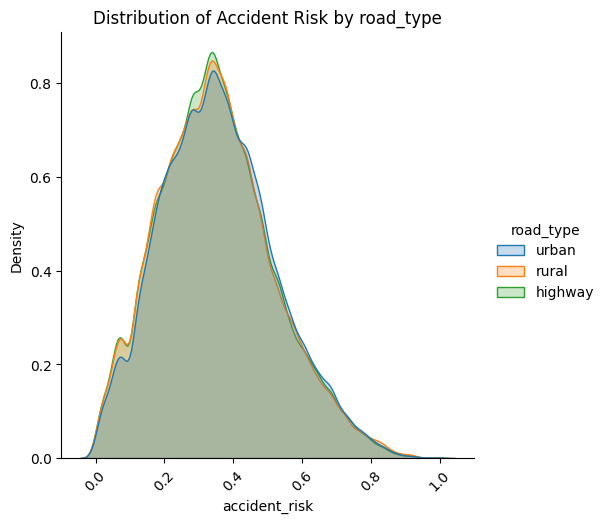

<Figure size 1000x600 with 0 Axes>

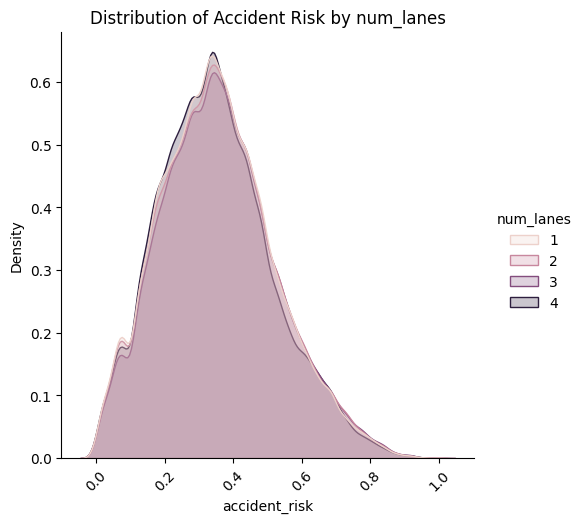

<Figure size 1000x600 with 0 Axes>

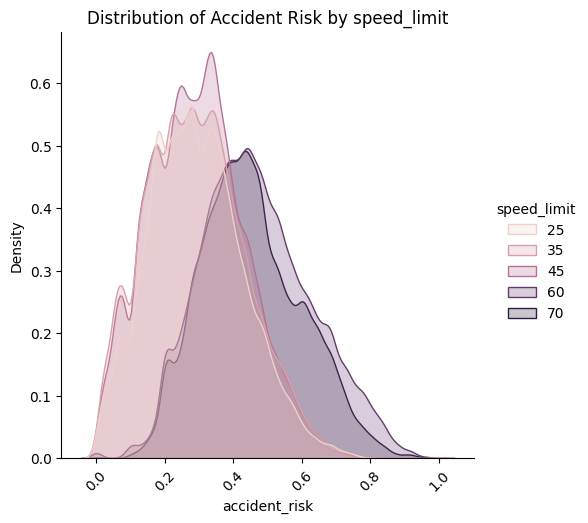

<Figure size 1000x600 with 0 Axes>

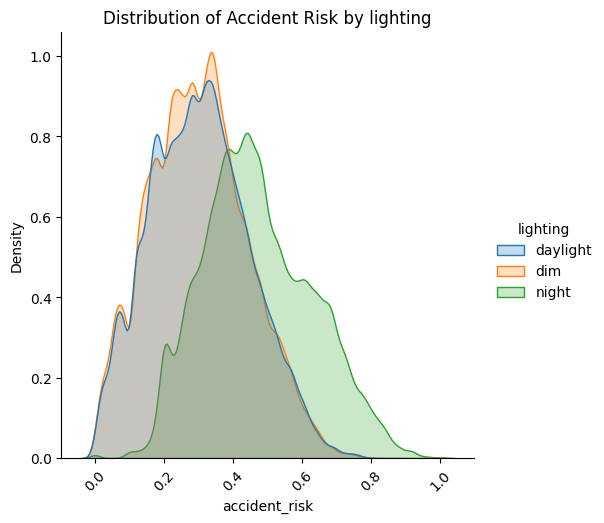

<Figure size 1000x600 with 0 Axes>

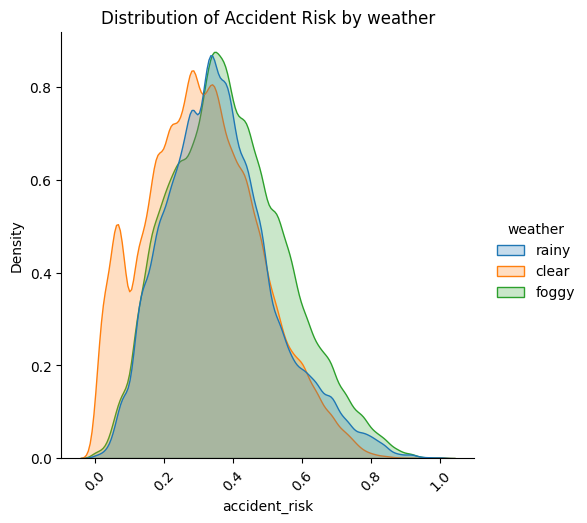

<Figure size 1000x600 with 0 Axes>

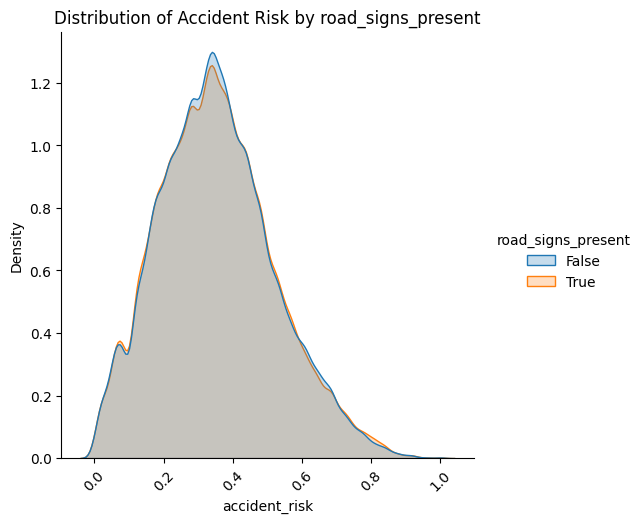

/var/folders/t_/gwd9gwtd5tx60zy6r4zx8l240000gn/T/ipykernel_8637/218881135.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df_train, x='accident_risk', hue=c, kind='kde', fill=True)


<Figure size 1000x600 with 0 Axes>

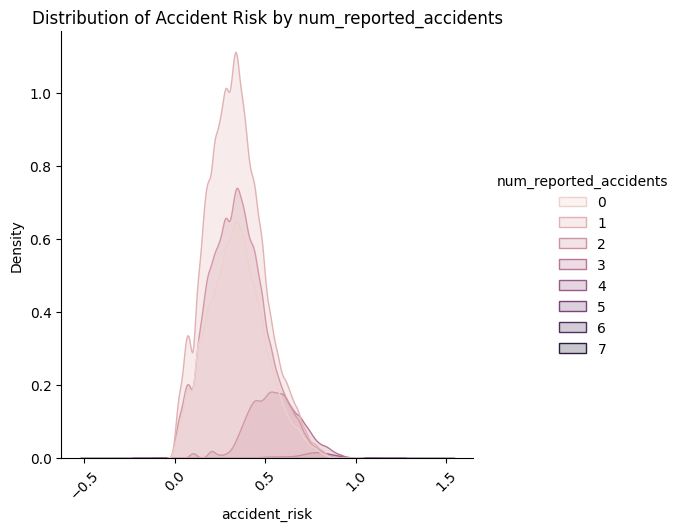

<Figure size 1000x600 with 0 Axes>

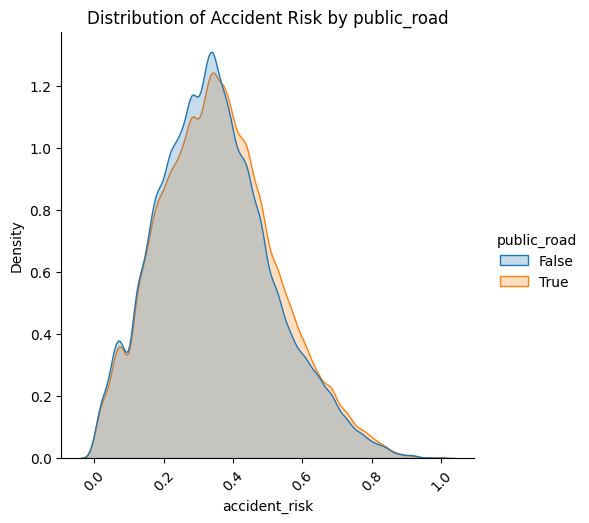

<Figure size 1000x600 with 0 Axes>

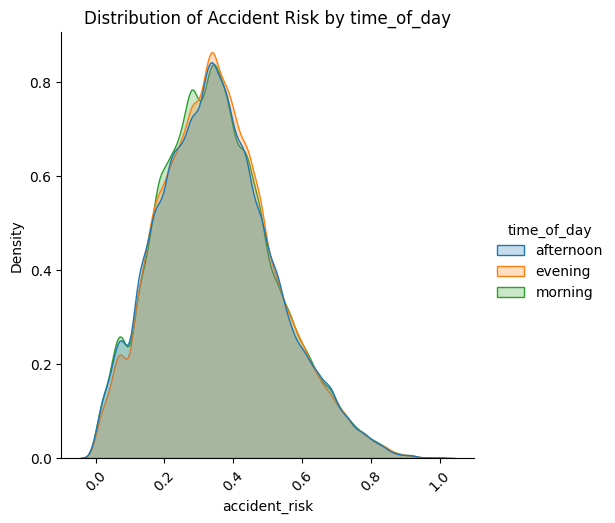

<Figure size 1000x600 with 0 Axes>

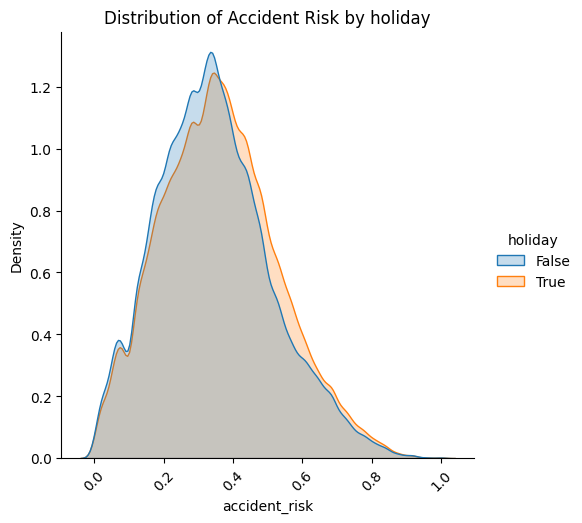

<Figure size 1000x600 with 0 Axes>

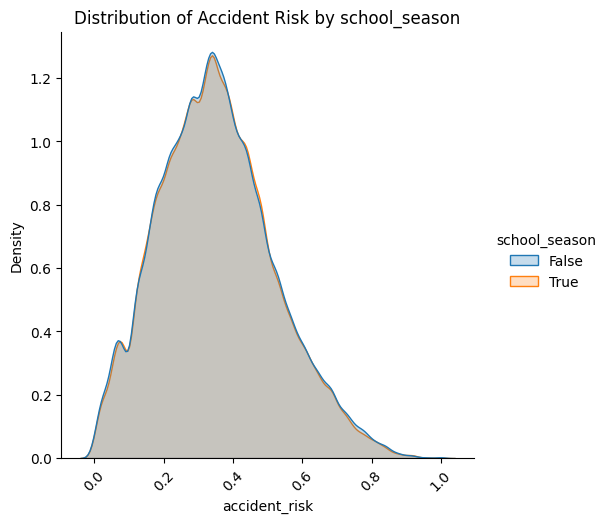

In [12]:
# draw distribution plot of target column 'accident_risk' according to categorical columns using distribution plots with different colors
for c in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df_train, x='accident_risk', hue=c, kind='kde', fill=True)
    plt.title(f'Distribution of Accident Risk by {c}')
    plt.xticks(rotation=45)
    plt.show()


## Conclusion

Those appears to be the highly impacting:
 - Curvature
 - Speed limit
 - lighting
 - weather
 - num_reported_accidents
 - holiday
 - road_type

In [13]:
selected_features = ['curvature', 'speed_limit', 'lighting', 'weather', 'num_reported_accidents', 'holiday', 'road_type']
X = df_train[[c for c in df_train.columns if c != 'accident_risk']]
y = df_train['accident_risk']
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression

In [ ]:
# import logistic regression model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import root_mean_squared_error

In [15]:
# create df transformed, using sklearn pipeline for transform and predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# transform
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


In [16]:

import statsmodels.api as sm
from sklearn.base import BaseEstimator, RegressorMixin
class StatsmodelsGLMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, family=sm.families.Binomial(), link=sm.families.links.logit()):
        self.family = family
        self.link = link
    
    def fit(self, X, y):
        # Add intercept
        X_ = sm.add_constant(X)
        self.model_ = sm.GLM(y, X_, family=self.family)
        self.results_ = self.model_.fit()
        return self
    
    def predict(self, X):
        X_ = sm.add_constant(X)
        # Get linear predictor and apply inverse link (e.g., logistic function)
        linear_pred = self.results_.predict(X_)
        return linear_pred  # These are predicted means, bounded between 0 and 1
    
    def predict_proba(self, X):
        # For compatibility with classification interface; returns probability of "success"
        return self.predict(X)

/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [17]:
df_train.columns

Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'],
      dtype='object')

In [18]:
cat_cols

['road_type',
 'num_lanes',
 'speed_limit',
 'lighting',
 'weather',
 'road_signs_present',
 'num_reported_accidents',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season']

### using all columns

In [19]:
# create pipeline for both transform and predict
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe, cat_cols),
    ],
    remainder='passthrough'  # keep other columns unchanged
)

pipeline_logistic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', StatsmodelsGLMWrapper())
])
pipeline_logistic.fit(X_train, y_train)
val_preds = pipeline_logistic.predict(X_val)

rmse_train = root_mean_squared_error(y_train, pipeline_logistic.predict_proba(X_train))
print(f'Training RMSE after transformation: {rmse_train}')

rmse_val = root_mean_squared_error(y_val, val_preds)
print(f'Validation RMSE after transformation: {rmse_val}')

Training RMSE after transformation: 0.05969312736260142
Validation RMSE after transformation: 0.05982721147620147


## using subset

In [20]:
[c for c in cat_cols+bool_cols if c in selected_features]

['road_type',
 'speed_limit',
 'lighting',
 'weather',
 'num_reported_accidents',
 'holiday',
 'holiday']

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe, [c for c in cat_cols if c in selected_features]),
    ],
    remainder='passthrough'  # keep other columns unchanged
)

pipeline_logistic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', StatsmodelsGLMWrapper())
])
pipeline_logistic.fit(X_train[selected_features], y_train)
val_preds = pipeline_logistic.predict(X_val[selected_features])

rmse_train = root_mean_squared_error(y_train, pipeline_logistic.predict_proba(X_train[selected_features]))
print(f'Training RMSE after transformation: {rmse_train}')

rmse_val = root_mean_squared_error(y_val, val_preds)
print(f'Validation RMSE after transformation: {rmse_val}')

Training RMSE after transformation: 0.05971213646989146
Validation RMSE after transformation: 0.059841927620260624


### On the whole dataset

In [22]:
pipeline_logistic.fit(df_train[selected_features], df_train['accident_risk'])

pred_all = pipeline_logistic.predict_proba(df_train[selected_features])

rmse_all = root_mean_squared_error(df_train['accident_risk'], pred_all)
print(f'Training RMSE after transformation: {rmse_all}')



Training RMSE after transformation: 0.05973408151584965


## Compare distribution of prediction and actual

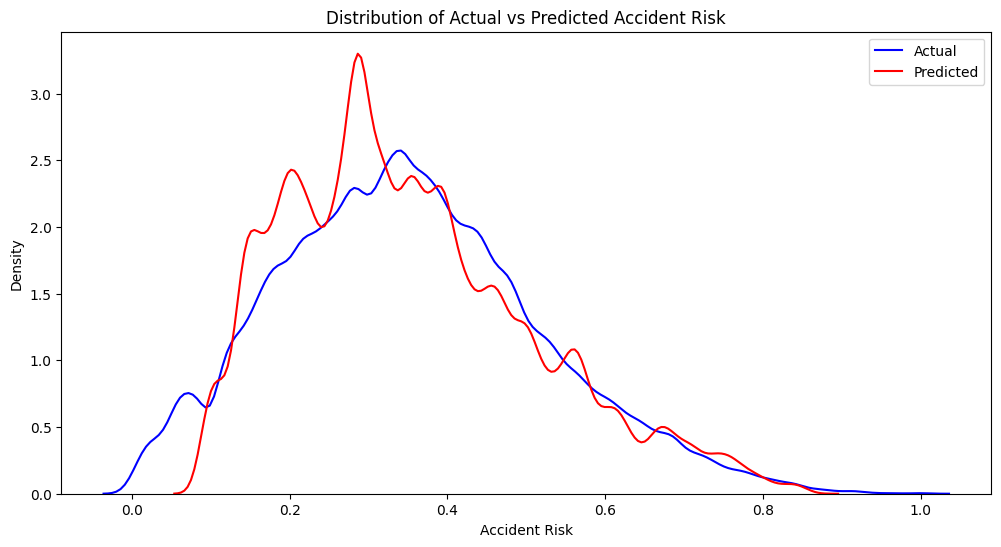

In [23]:
## Compare distribution of prediction and actual

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.kdeplot(df_train['accident_risk'], label='Actual', color='blue')
sns.kdeplot(pred_all, label='Predicted', color='red')
plt.title('Distribution of Actual vs Predicted Accident Risk')
plt.xlabel('Accident Risk')
plt.ylabel('Density')
plt.legend()
plt.show()


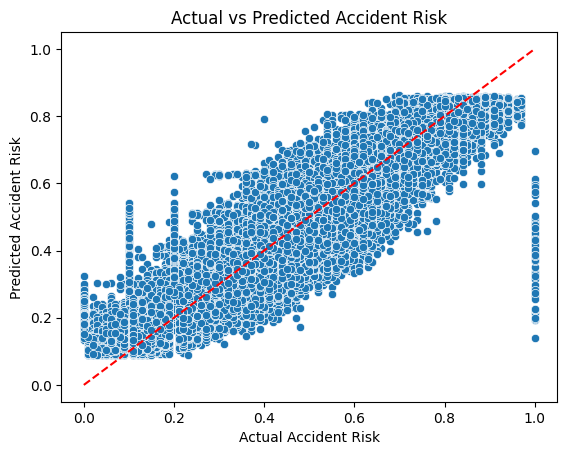

In [24]:
# compare prediction and actual
sns.scatterplot(x=df_train['accident_risk'], y=pred_all)
plt.xlabel('Actual Accident Risk')
plt.ylabel('Predicted Accident Risk')
# add diagonal line y=x
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Actual vs Predicted Accident Risk')
plt.show()

# Other types of regression


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [26]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe, [c for c in cat_cols if c in selected_features]),
    ],
    remainder='passthrough'  # keep other columns unchanged
)



# Define the full pipeline with a placeholder regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', StatsmodelsGLMWrapper())
])

# Define the different regressors to choose from
regressors = {
    'glm_logit': StatsmodelsGLMWrapper(),
    'random_forest': RandomForestRegressor(random_state=42),
    'lightgbm': LGBMRegressor(random_state=42),
    'catboost': CatBoostRegressor(verbose=0, random_seed=42)
}

# Parameters for grid search over estimator choice
param_grid = [
    {'regressor': [regressors['glm_logit']]},
    {'regressor': [regressors['random_forest']], 
     'regressor__n_estimators': [100, 200]},
    {'regressor': [regressors['lightgbm']], 
     'regressor__n_estimators': [100, 200]},
    {'regressor': [regressors['catboost']], 
     'regressor__iterations': [100, 200]}
]

# Example: use GridSearchCV to find the best model
search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit on train data (X_train, y_train)
search.fit(df_train[selected_features], df_train['accident_risk'])

# To get the best model and predictions:
best_model = search.best_estimator_


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 23
[LightGBM] [Info] Start training from score 0.352583


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 23
[LightGBM] [Info] Start training from score 0.352340


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 24
[LightGBM] [Info] Start training from score 0.352204


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 24
[LightGBM] [Info] Start training from score 0.352302


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 414204, number of used features: 24
[LightGBM] [Info] Start training from score 0.352459


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 23
[LightGBM] [Info] Start training from score 0.352583


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 23
[LightGBM] [Info] Start training from score 0.352340


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 24
[LightGBM] [Info] Start training from score 0.352204


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 24
[LightGBM] [Info] Start training from score 0.352302


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 414204, number of used features: 24
[LightGBM] [Info] Start training from score 0.352459


/Users/huyen/Documents/Kaggle/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


# Fitting on all and make prediction

In [27]:
best_model = search.best_estimator_
pred_all = best_model.predict(df_train[selected_features])
rmse = root_mean_squared_error(pred_all, df_train['accident_risk']) # validation
print(f'RMSE on all dataset: {rmse}')

RMSE on all dataset: 0.05589517050719084


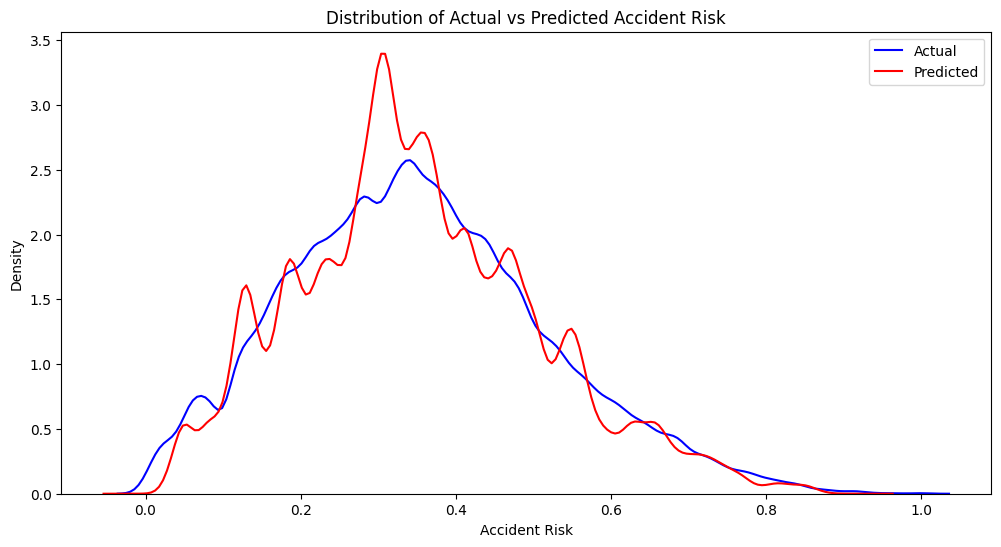

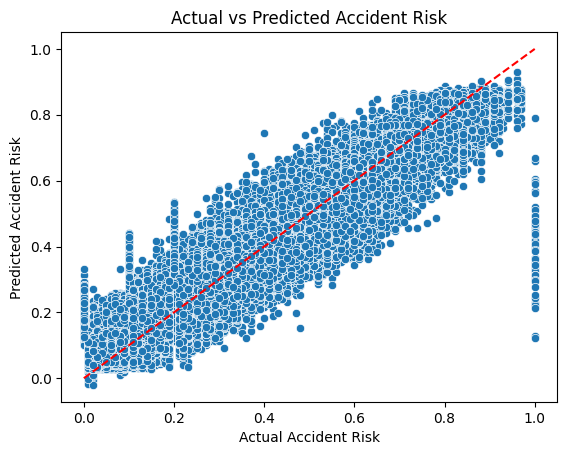

In [28]:
## Compare distribution of prediction and actual

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.kdeplot(df_train['accident_risk'], label='Actual', color='blue')
sns.kdeplot(pred_all, label='Predicted', color='red')
plt.title('Distribution of Actual vs Predicted Accident Risk')
plt.xlabel('Accident Risk')
plt.ylabel('Density')
plt.legend()
plt.show()


# compare prediction and actual
sns.scatterplot(x=df_train['accident_risk'], y=pred_all)
plt.xlabel('Actual Accident Risk')
plt.ylabel('Predicted Accident Risk')
# add diagonal line y=x
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Actual vs Predicted Accident Risk')
plt.show()


In [29]:
# see the samples with the highest errors
errors = np.abs(df_train['accident_risk'] - pred_all)
df_errors = df_train.copy()
df_errors['error'] = errors
df_errors['predicted'] = pred_all
df_errors_sorted = df_errors.sort_values(by='error', ascending=False)
df_errors_sorted.head(10)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk,error,predicted
201077,201077,rural,3,0.15,35,daylight,foggy,True,False,morning,True,True,3,1.0,0.876892,0.123108
24483,24483,highway,3,0.03,45,dim,foggy,False,True,morning,False,False,2,1.0,0.872945,0.127055
385171,385171,highway,3,0.14,25,dim,rainy,False,True,afternoon,False,False,3,1.0,0.786709,0.213291
157779,157779,urban,3,0.01,60,dim,clear,False,True,afternoon,True,False,2,1.0,0.782528,0.217472
252873,252873,rural,2,0.02,60,dim,clear,True,True,morning,False,False,2,1.0,0.782097,0.217903
352095,352095,urban,1,0.14,25,daylight,rainy,False,True,morning,False,True,3,1.0,0.777193,0.222807
2601,2601,rural,3,0.37,35,dim,rainy,True,False,evening,True,False,2,1.0,0.773039,0.226961
180977,180977,urban,1,0.22,25,night,clear,True,False,afternoon,False,False,3,1.0,0.770155,0.229845
401825,401825,urban,4,0.06,70,dim,clear,False,False,morning,True,False,3,1.0,0.755526,0.244474
495325,495325,urban,2,0.04,35,night,clear,True,False,morning,True,False,3,1.0,0.747866,0.252134


In [30]:
# see the samples with the lowest errors
df_errors_sorted = df_errors.sort_values(by='error', ascending=True)
df_errors_sorted.head(10)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk,error,predicted
76673,76673,highway,4,0.28,45,night,clear,False,False,morning,False,True,0,0.29,2.708688e-08,0.290000
432395,432395,rural,2,0.82,25,night,clear,False,True,evening,False,False,1,0.44,1.810368e-07,0.440000
472318,472318,rural,2,0.82,25,night,clear,False,False,morning,False,False,1,0.44,1.810368e-07,0.440000
404526,404526,rural,3,0.82,25,night,clear,False,False,morning,False,False,1,0.44,1.810368e-07,0.440000
436875,436875,urban,2,0.58,25,night,rainy,False,False,morning,True,False,1,0.47,2.263563e-07,0.470000
417991,417991,urban,3,0.58,25,night,rainy,True,False,morning,True,True,1,0.47,2.263563e-07,0.470000
105593,105593,urban,3,0.58,25,night,rainy,True,True,morning,True,False,1,0.47,2.263563e-07,0.470000
258717,258717,highway,3,0.65,35,dim,clear,False,True,evening,False,False,1,0.21,5.276227e-07,0.209999
494642,494642,highway,2,0.65,35,dim,clear,False,True,afternoon,False,False,1,0.21,5.276227e-07,0.209999
165201,165201,highway,4,0.87,25,dim,rainy,False,True,evening,True,True,1,0.35,6.837631e-07,0.350001


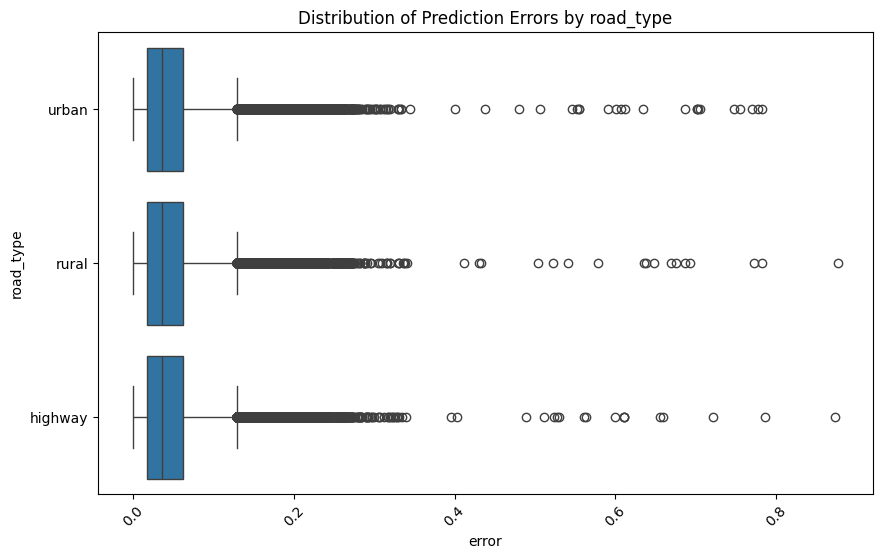

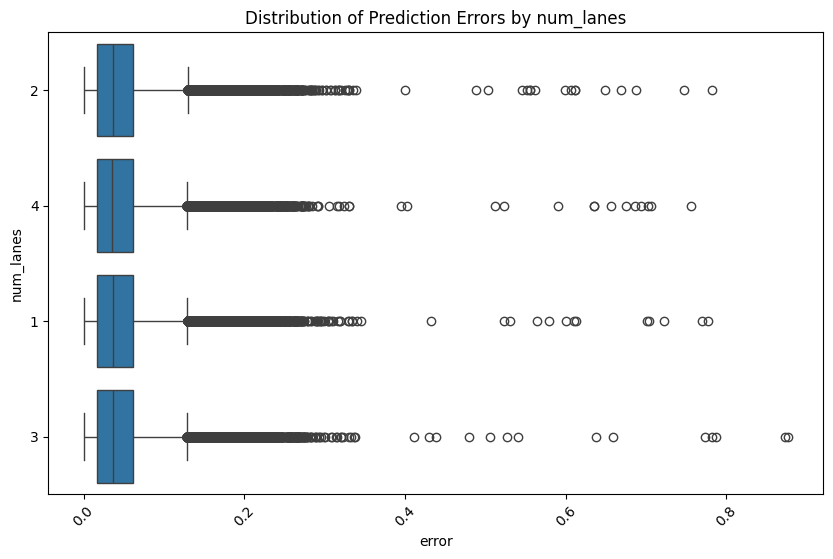

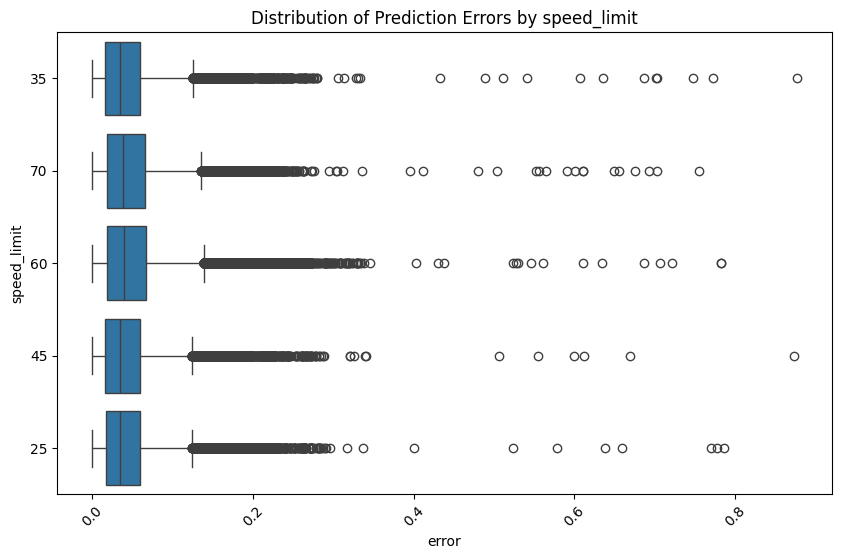

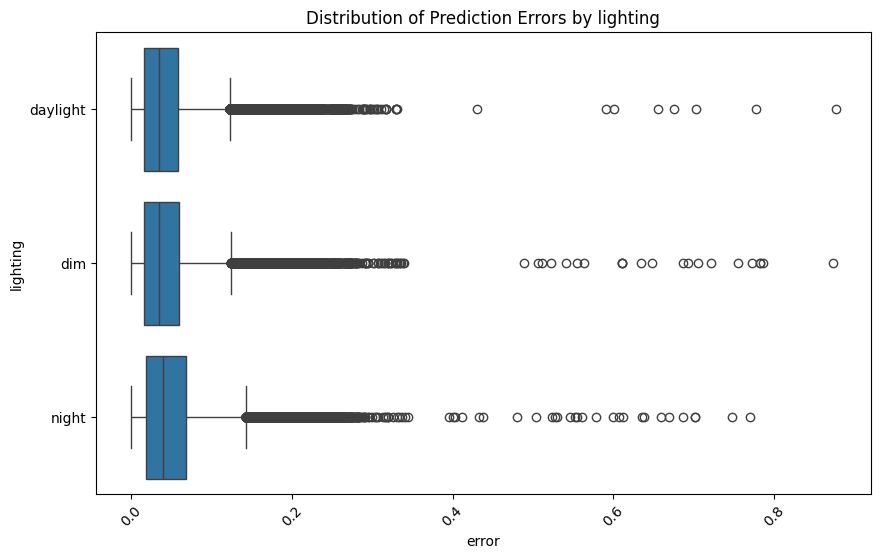

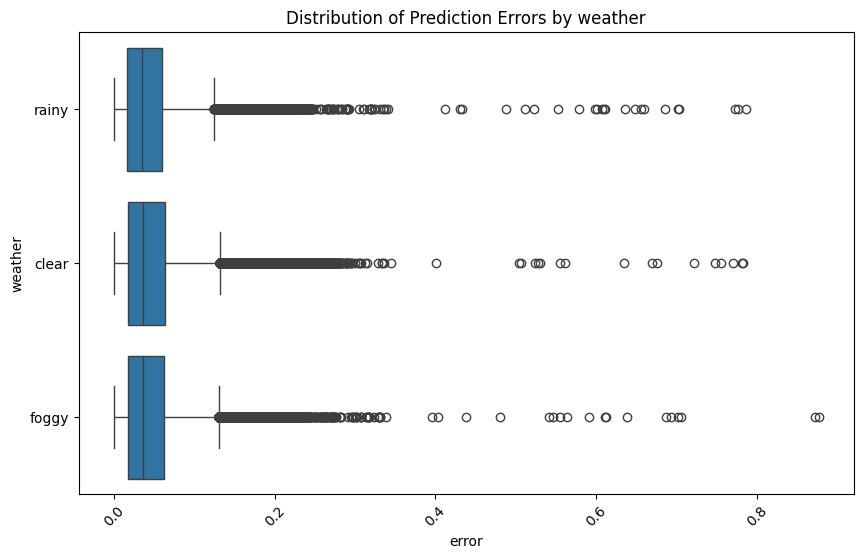

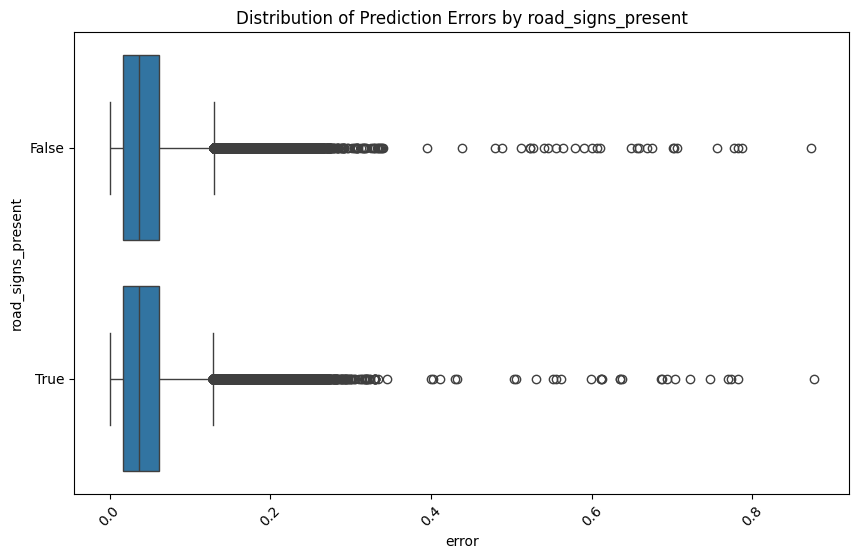

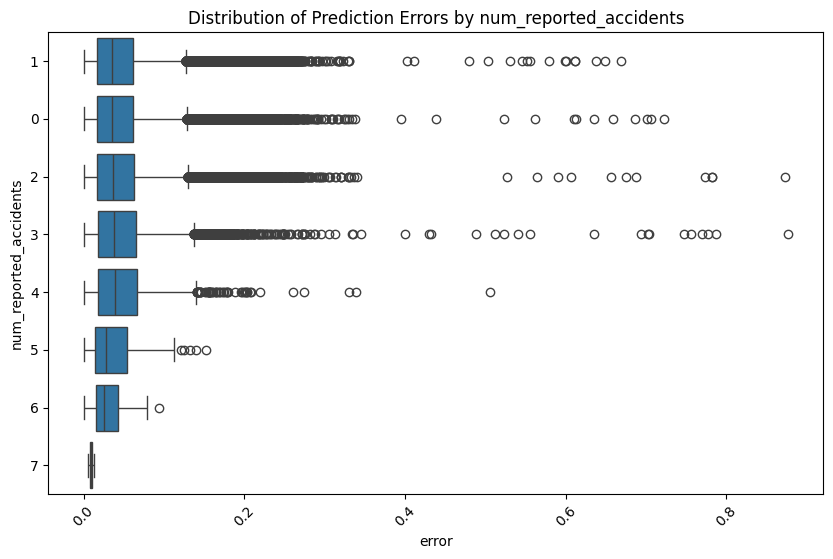

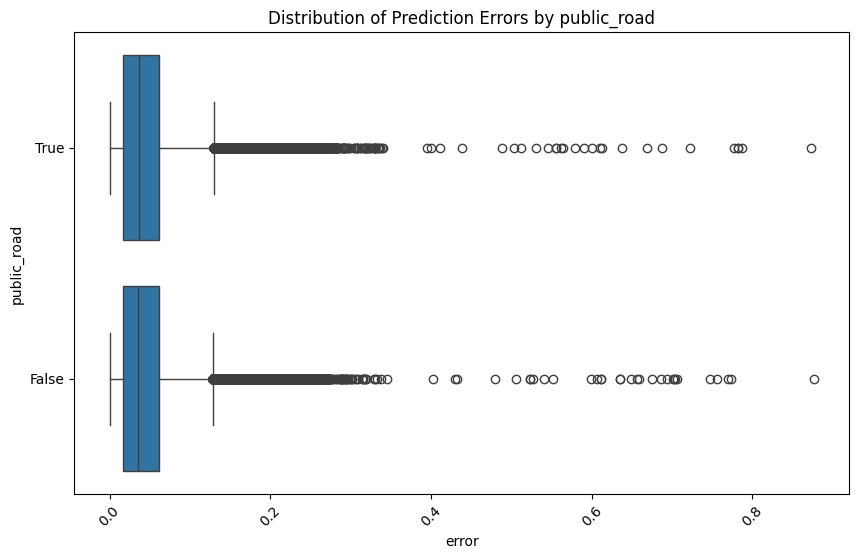

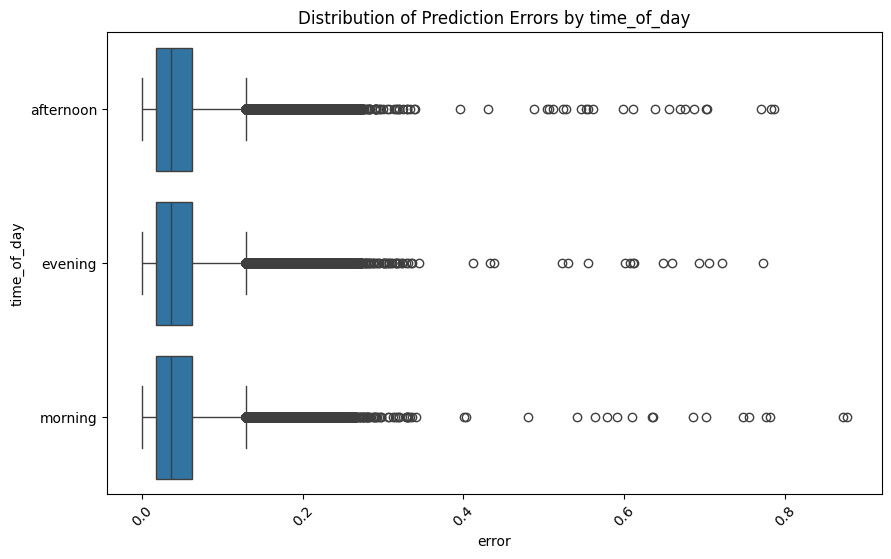

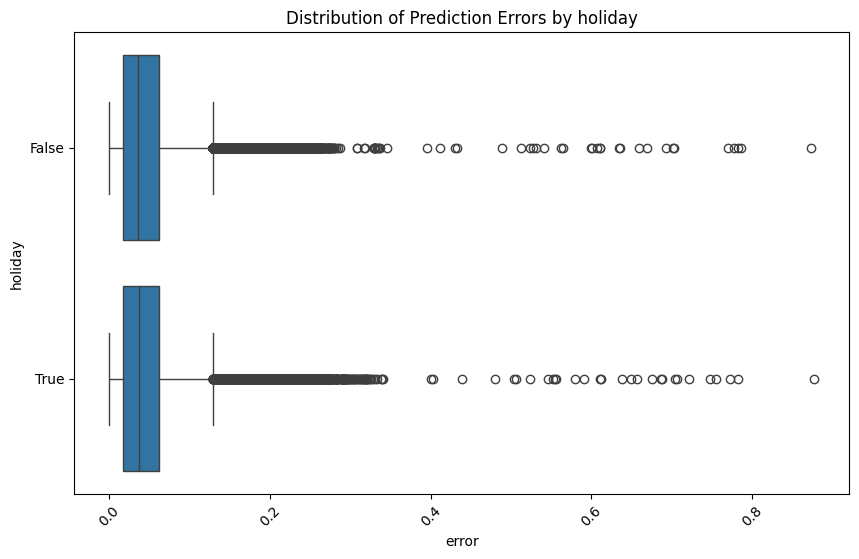

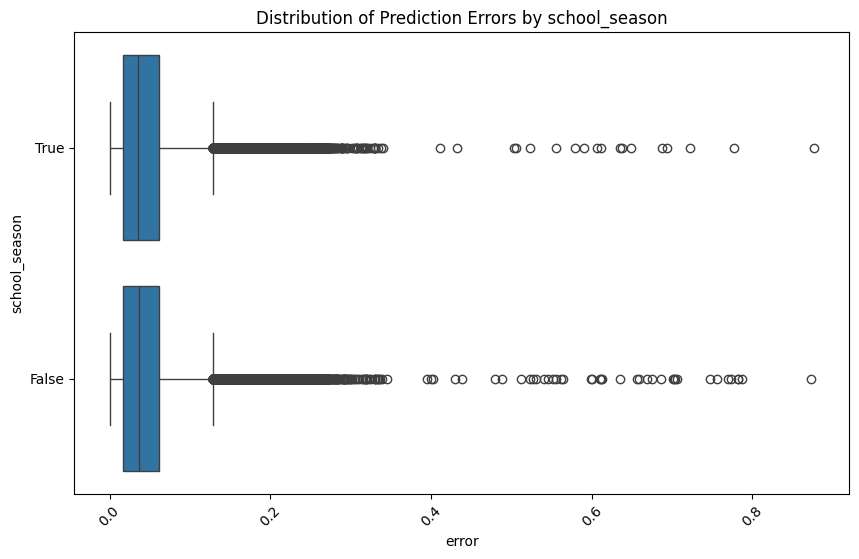

In [31]:
# distribution of errors with categorical features
df_errors[cat_cols] = df_errors[cat_cols].astype(str)
for c in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_errors, x='error', y=c)
    plt.title(f'Distribution of Prediction Errors by {c}')
    plt.xticks(rotation=45)
    plt.show()


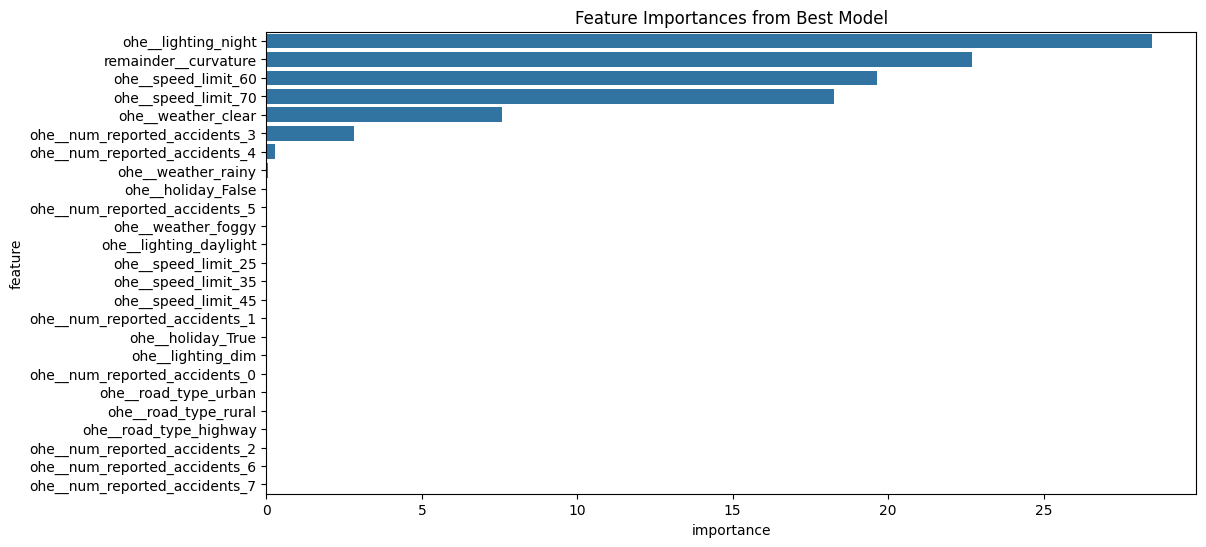

In [ ]:
# feature importance from best model if applicable
if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    importances = best_model.named_steps['regressor'].feature_importances_
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance_df, x='importance', y='feature')
    plt.title('Feature Importances from Best Model')
    plt.show()

# Where there is for sure an accident?

In [39]:
# filter the case where accident_risk is 1
df_errors_filtered = df_errors[df_errors['accident_risk'] == 1]
df_errors_filtered.describe()

,id,curvature,accident_risk,error,predicted
count,61.000000,61.000000,61.0,61.000000,61.000000
mean,229268.540984,0.331148,1.0,0.597195,0.402805
std,154571.539146,0.275833,0.0,0.136419,0.136419
min,2601.000000,0.010000,1.0,0.208980,0.123108
25%,68637.000000,0.140000,1.0,0.523151,0.306651
50%,252873.000000,0.290000,1.0,0.607282,0.392718
75%,336927.000000,0.430000,1.0,0.693349,0.476849
max,502435.000000,0.970000,1.0,0.876892,0.791020


In [60]:
df_errors[df_errors['weather'].isin(['rainy', 'foggy']) | 
          ((df_errors['lighting'] == 'dim') & (df_errors['time_of_day'].isin(['afternoon', 'evening'])))]

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk,error,predicted
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13,0.000199,0.129801
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21,0.078608,0.131392
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56,0.087600,0.472400
5,5,highway,3,0.54,70,night,foggy,True,False,morning,False,True,0,0.61,0.048679,0.658679
6,6,highway,1,0.04,45,night,foggy,False,True,morning,True,False,2,0.20,0.111387,0.311387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517748,517748,rural,2,0.53,70,dim,foggy,True,True,afternoon,True,True,2,0.37,0.090863,0.460863
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32,0.001492,0.318508
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26,0.014153,0.245847
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19,0.106129,0.296129


In [50]:
df_train[df_train['curvature'] > 0.5].sort_values(by='accident_risk', ascending=True ).head(10)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
494751,494751,highway,1,0.72,45,dim,clear,True,True,evening,False,False,1,0.0
337434,337434,rural,3,0.73,45,daylight,clear,True,False,morning,True,False,2,0.0
158093,158093,urban,3,0.57,35,daylight,clear,True,False,afternoon,True,False,1,0.0
378978,378978,urban,3,0.80,45,dim,clear,True,True,afternoon,True,False,1,0.0
42881,42881,highway,4,0.80,35,daylight,clear,False,False,evening,False,False,2,0.0
379728,379728,rural,1,0.80,45,daylight,clear,True,True,afternoon,False,True,0,0.0
446397,446397,highway,2,0.59,45,dim,clear,True,False,evening,False,False,1,0.0
160074,160074,highway,4,0.70,25,dim,clear,True,True,afternoon,True,True,2,0.0
43836,43836,rural,2,0.80,45,daylight,clear,True,False,afternoon,True,True,0,0.0
444990,444990,urban,3,0.63,45,daylight,clear,False,True,morning,True,False,0,0.0


In [76]:
best_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ohe',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['road_type', 'speed_limit', 'lighting',
                                     'weather', 'num_reported_accidents',
                                     'holiday'])])),
  ('regressor', <catboost.core.CatBoostRegressor at 0x11bf55f90>)],
 'transform_input': None,
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['road_type', 'speed_limit', 'lighting',
                                   'weather', 'num_reported_accidents',
           

# Submission 

In [86]:
best_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ohe',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['road_type', 'speed_limit', 'lighting',
                                     'weather', 'num_reported_accidents',
                                     'holiday'])])),
  ('regressor', <catboost.core.CatBoostRegressor at 0x11bf55f90>)],
 'transform_input': None,
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['road_type', 'speed_limit', 'lighting',
                                   'weather', 'num_reported_accidents',
           

In [32]:
# generate submission file
pred_test = best_model.predict(df_test[selected_features])
submission = pd.DataFrame({'id': df_test['id'],
                           'accident_risk': pred_test})
submission.head()


,id,accident_risk
0,517754,0.295076
1,517755,0.124214
2,517756,0.189742
3,517757,0.330986
4,517758,0.397246


In [33]:
submission.to_csv('submission.csv', index=False)